# 1.Problem
The problem is about finding where the given features corresponds in breed category and pet category.

# 2.Data
The data is taken from hacker earth competition.

# 3.Features
**The features include:**

**pet_id issue_date	listing_date	condition	color_type	length(m)	height(cm)	X1	X2**

# 4.Evaluation
The evaluation is based on multilogloss error.


In [1]:
## GETTING OUR TOOLS READY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

In [2]:
## importing  our training dataset
train_data=pd.read_csv("train.csv")
train_data

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


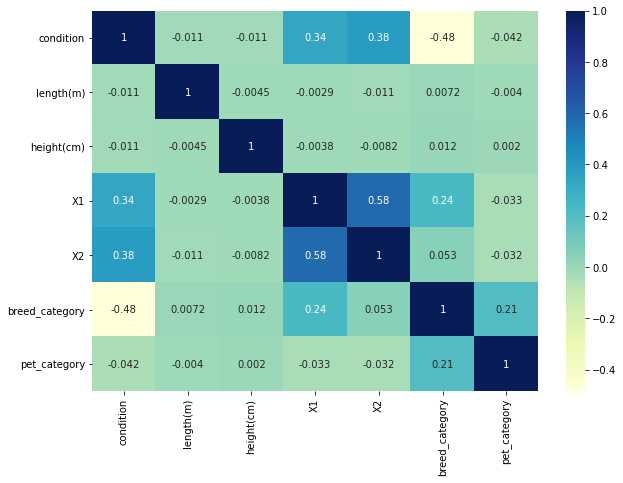

In [9]:
## Checking the correlation after analysis
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.heatmap(train_data.corr(),
              annot=True,
              cmap="YlGnBu")

In [4]:
## Getting the count of values in labels
breed_count=train_data["breed_category"].value_counts()
pet_count=train_data["pet_category"].value_counts()
breed_count,pet_count

(0.0    9000
 1.0    8357
 2.0    1477
 Name: breed_category, dtype: int64,
 2    10621
 1     7184
 4      941
 0       88
 Name: pet_category, dtype: int64)

In [6]:
## Checking info of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [8]:
## Couting the no.of colors
len(train_data["color_type"].value_counts())

56

**THere are 56 types of color**

In [10]:
## Let's check whether there are null values or not
for label,content in train_data.items():
    if pd.isnull(content).sum():
        print(label)
        

condition


In [11]:
## Describe the data
train_data.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [37]:
## Couting the no category and visualizing
a=train_data["breed_category"].value_counts()
b=train_data["pet_category"].value_counts()

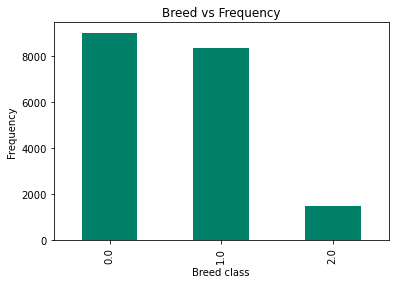

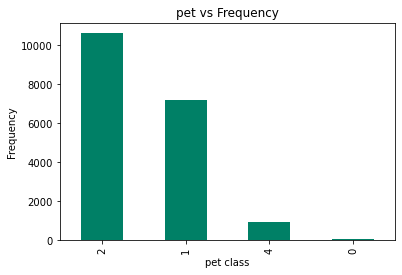

In [39]:
## Visualize the breed category and pet category
a.plot(kind="bar",cmap="summer");
plt.xlabel("Breed class")
plt.ylabel("Frequency")
plt.title("Breed vs Frequency")
plt.show()

b.plot(kind="bar",cmap="summer");
plt.xlabel("pet class")
plt.ylabel("Frequency")
plt.title("pet vs Frequency")
plt.show()

# PREPROCESSING THE DATA

### THE LISTING_DATE AND ISSUE_DATE NEEDS TO BE PARSED INTO DATE AND TIME OBJECT

In [40]:
train_data

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


In [47]:
train_data["issue_date"]=pd.to_datetime(train_data["issue_date"])
train_data["listing_date"]=pd.to_datetime(train_data["listing_date"])

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pet_id          18834 non-null  object        
 1   issue_date      18834 non-null  datetime64[ns]
 2   listing_date    18834 non-null  datetime64[ns]
 3   condition       17357 non-null  float64       
 4   color_type      18834 non-null  object        
 5   length(m)       18834 non-null  float64       
 6   height(cm)      18834 non-null  float64       
 7   X1              18834 non-null  int64         
 8   X2              18834 non-null  int64         
 9   breed_category  18834 non-null  float64       
 10  pet_category    18834 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 1.6+ MB


In [55]:
## Separating the date and time

train_data["issue_date1"]=train_data["issue_date"].dt.date
train_data["issue_time"]=train_data["issue_date"].dt.time
#train_data["issue_year"]=train_data["issue_date"].dt.date.year
#train_data["issue_month"]=train_data["issue_date"].dt.date.month
#train_data["issue_day"]=train_data["issue_date"].dt.date.day


In [56]:
train_data.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_date1,issue_time
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016-07-10,00:00:00
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013-11-21,00:00:00
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014-09-28,00:00:00
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016-12-31,00:00:00
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017-09-28,00:00:00


In [60]:
train_data["issue_time"].value_counts()

00:00:00    18834
Name: issue_time, dtype: int64

**Since the issue time all are 0, it doesn't influence the prediction so, it is deleted.**

In [62]:
train_data.drop("issue_time",axis=1,inplace=True)

In [63]:
train_data

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_date1
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016-07-10
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013-11-21
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014-09-28
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016-12-31
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017-01-26
18830,ANSL_59900,2016-06-18,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4,2016-06-18
18831,ANSL_53210,2010-07-21,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010-07-21
18832,ANSL_63468,2017-05-12,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2,2017-05-12


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pet_id          18834 non-null  object        
 1   issue_date      18834 non-null  datetime64[ns]
 2   listing_date    18834 non-null  datetime64[ns]
 3   condition       17357 non-null  float64       
 4   color_type      18834 non-null  object        
 5   length(m)       18834 non-null  float64       
 6   height(cm)      18834 non-null  float64       
 7   X1              18834 non-null  int64         
 8   X2              18834 non-null  int64         
 9   breed_category  18834 non-null  float64       
 10  pet_category    18834 non-null  int64         
 11  issue_date1     18834 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 1.7+ MB


In [73]:
## Let's divide the date into day,year and month
train_data["issue_year"]=train_data["issue_date"].dt.year
train_data["issue_month"]=train_data["issue_date"].dt.month
train_data["issue_day"]=train_data["issue_date"].dt.day


In [74]:
train_data

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_date1,issue_year,issue_month,issue_day
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016-07-10,2016,7,10
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013-11-21,2013,11,21
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014-09-28,2014,9,28
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016-12-31,2016,12,31
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017-09-28,2017,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017-01-26,2017,1,26
18830,ANSL_59900,2016-06-18,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4,2016-06-18,2016,6,18
18831,ANSL_53210,2010-07-21,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010-07-21,2010,7,21
18832,ANSL_63468,2017-05-12,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2,2017-05-12,2017,5,12


In [76]:
## Lets perform the same operation for listing_date


train_data["listing_year"]=train_data["listing_date"].dt.year
train_data["listing_month"]=train_data["listing_date"].dt.month
train_data["listing_day"]=train_data["listing_date"].dt.day


In [77]:
train_data

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_date1,issue_year,issue_month,issue_day,listing_date1,listing_time,listing_year,listing_month,listing_day
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016-07-10,2016,7,10,2016-09-21,16:25:00,2016,9,21
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013-11-21,2013,11,21,2018-12-27,17:47:00,2018,12,27
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014-09-28,2014,9,28,2016-10-19,08:24:00,2016,10,19
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016-12-31,2016,12,31,2019-01-25,18:30:00,2019,1,25
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017-09-28,2017,9,28,2017-11-19,09:38:00,2017,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017-01-26,2017,1,26,2018-03-09,15:35:00,2018,3,9
18830,ANSL_59900,2016-06-18,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4,2016-06-18,2016,6,18,2017-07-09,08:37:00,2017,7,9
18831,ANSL_53210,2010-07-21,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010-07-21,2010,7,21,2018-08-22,14:27:00,2018,8,22
18832,ANSL_63468,2017-05-12,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2,2017-05-12,2017,5,12,2018-02-08,14:05:00,2018,2,8


In [78]:
## Drop unnecessary columns
train_data.drop(["issue_date","issue_date1","listing_date1"],axis=1,inplace=True)

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pet_id          18834 non-null  object        
 1   listing_date    18834 non-null  datetime64[ns]
 2   condition       17357 non-null  float64       
 3   color_type      18834 non-null  object        
 4   length(m)       18834 non-null  float64       
 5   height(cm)      18834 non-null  float64       
 6   X1              18834 non-null  int64         
 7   X2              18834 non-null  int64         
 8   breed_category  18834 non-null  float64       
 9   pet_category    18834 non-null  int64         
 10  issue_year      18834 non-null  int64         
 11  issue_month     18834 non-null  int64         
 12  issue_day       18834 non-null  int64         
 13  listing_time    18834 non-null  object        
 14  listing_year    18834 non-null  int64         
 15  li

In [83]:
train_data["listing_hour"]=train_data["listing_date"].dt.strftime("%H")
train_data["listing_minute"]=train_data["listing_date"].dt.strftime("%M")
train_data["listing_second"]=train_data["listing_date"].dt.strftime("%S")


In [84]:
train_data

,pet_id,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,issue_month,issue_day,listing_time,listing_year,listing_month,listing_day,listing_hour,listing_minute,listing_second
0,ANSL_69903,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,16:25:00,2016,9,21,16,25,00
1,ANSL_66892,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,17:47:00,2018,12,27,17,47,00
2,ANSL_69750,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,08:24:00,2016,10,19,08,24,00
3,ANSL_71623,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,18:30:00,2019,1,25,18,30,00
4,ANSL_57969,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,09:38:00,2017,11,19,09,38,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017,1,26,15:35:00,2018,3,9,15,35,00
18830,ANSL_59900,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4,2016,6,18,08:37:00,2017,7,9,08,37,00
18831,ANSL_53210,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010,7,21,14:27:00,2018,8,22,14,27,00
18832,ANSL_63468,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2,2017,5,12,14:05:00,2018,2,8,14,05,00


In [85]:
##Dropping the unrequired columns
train_data["listing_second"].value_counts()

00    18834
Name: listing_second, dtype: int64

In [89]:
train_data.drop(["listing_date","listing_time"],axis=1,inplace=True)

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   condition       17357 non-null  float64
 2   color_type      18834 non-null  object 
 3   length(m)       18834 non-null  float64
 4   height(cm)      18834 non-null  float64
 5   X1              18834 non-null  int64  
 6   X2              18834 non-null  int64  
 7   breed_category  18834 non-null  float64
 8   pet_category    18834 non-null  int64  
 9   issue_year      18834 non-null  int64  
 10  issue_month     18834 non-null  int64  
 11  issue_day       18834 non-null  int64  
 12  listing_year    18834 non-null  int64  
 13  listing_month   18834 non-null  int64  
 14  listing_day     18834 non-null  int64  
 15  listing_hour    18834 non-null  object 
 16  listing_minute  18834 non-null  object 
dtypes: float64(4), int64(9), object

In [91]:
train_data

,pet_id,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day,listing_hour,listing_minute
0,ANSL_69903,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,2016,9,21,16,25
1,ANSL_66892,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,2018,12,27,17,47
2,ANSL_69750,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,2016,10,19,08,24
3,ANSL_71623,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,2019,1,25,18,30
4,ANSL_57969,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,2017,11,19,09,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017,1,26,2018,3,9,15,35
18830,ANSL_59900,NaN,Brown,0.73,14.25,15,4,2.0,4,2016,6,18,2017,7,9,08,37
18831,ANSL_53210,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010,7,21,2018,8,22,14,27
18832,ANSL_63468,0.0,Tan,0.55,44.82,13,9,1.0,2,2017,5,12,2018,2,8,14,05


In [102]:
id=[]
for label in train_data["pet_id"]:
    id.append(int(label[5:]))

In [109]:
train_data["id"]=id

In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   condition       17357 non-null  float64
 2   color_type      18834 non-null  object 
 3   length(m)       18834 non-null  float64
 4   height(cm)      18834 non-null  float64
 5   X1              18834 non-null  int64  
 6   X2              18834 non-null  int64  
 7   breed_category  18834 non-null  float64
 8   pet_category    18834 non-null  int64  
 9   issue_year      18834 non-null  int64  
 10  issue_month     18834 non-null  int64  
 11  issue_day       18834 non-null  int64  
 12  listing_year    18834 non-null  int64  
 13  listing_month   18834 non-null  int64  
 14  listing_day     18834 non-null  int64  
 15  listing_hour    18834 non-null  object 
 16  listing_minute  18834 non-null  object 
 17  id              18834 non-null 

In [111]:
train_data.drop("pet_id",axis=1,inplace=True)

In [112]:
train_data

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day,listing_hour,listing_minute,id
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,2016,9,21,16,25,69903
1,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,2018,12,27,17,47,66892
2,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,2016,10,19,08,24,69750
3,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,2019,1,25,18,30,71623
4,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,2017,11,19,09,38,57969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017,1,26,2018,3,9,15,35,51738
18830,NaN,Brown,0.73,14.25,15,4,2.0,4,2016,6,18,2017,7,9,08,37,59900
18831,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010,7,21,2018,8,22,14,27,53210
18832,0.0,Tan,0.55,44.82,13,9,1.0,2,2017,5,12,2018,2,8,14,05,63468


## FIlling the missing values

In [113]:
train_data["condition"].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [115]:
train_data["condition"].fillna(train_data["condition"].median(),inplace=True)

In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       18834 non-null  float64
 1   color_type      18834 non-null  object 
 2   length(m)       18834 non-null  float64
 3   height(cm)      18834 non-null  float64
 4   X1              18834 non-null  int64  
 5   X2              18834 non-null  int64  
 6   breed_category  18834 non-null  float64
 7   pet_category    18834 non-null  int64  
 8   issue_year      18834 non-null  int64  
 9   issue_month     18834 non-null  int64  
 10  issue_day       18834 non-null  int64  
 11  listing_year    18834 non-null  int64  
 12  listing_month   18834 non-null  int64  
 13  listing_day     18834 non-null  int64  
 14  listing_hour    18834 non-null  object 
 15  listing_minute  18834 non-null  object 
 16  id              18834 non-null  int64  
dtypes: float64(4), int64(10), objec

In [117]:
train_data

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day,listing_hour,listing_minute,id
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,2016,9,21,16,25,69903
1,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,2018,12,27,17,47,66892
2,1.0,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,2016,10,19,08,24,69750
3,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,2019,1,25,18,30,71623
4,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,2017,11,19,09,38,57969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017,1,26,2018,3,9,15,35,51738
18830,1.0,Brown,0.73,14.25,15,4,2.0,4,2016,6,18,2017,7,9,08,37,59900
18831,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010,7,21,2018,8,22,14,27,53210
18832,0.0,Tan,0.55,44.82,13,9,1.0,2,2017,5,12,2018,2,8,14,05,63468


In [118]:
## Export the preprocessed data
train_data.to_csv("train_preprocessed_data.csv",index=False)

**IMPORTING THE PREPROCESSED DATA**

In [7]:
import_train=pd.read_csv("train_preprocessed_data.csv")
import_train

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day,listing_hour,listing_minute,id
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,2016,9,21,16,25,69903
1,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,2018,12,27,17,47,66892
2,1.0,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,2016,10,19,8,24,69750
3,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,2019,1,25,18,30,71623
4,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,2017,11,19,9,38,57969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,0.0,2,2017,1,26,2018,3,9,15,35,51738
18830,1.0,Brown,0.73,14.25,15,4,2.0,4,2016,6,18,2017,7,9,8,37,59900
18831,0.0,Calico Point,0.99,28.13,13,9,1.0,1,2010,7,21,2018,8,22,14,27,53210
18832,0.0,Tan,0.55,44.82,13,9,1.0,2,2017,5,12,2018,2,8,14,5,63468


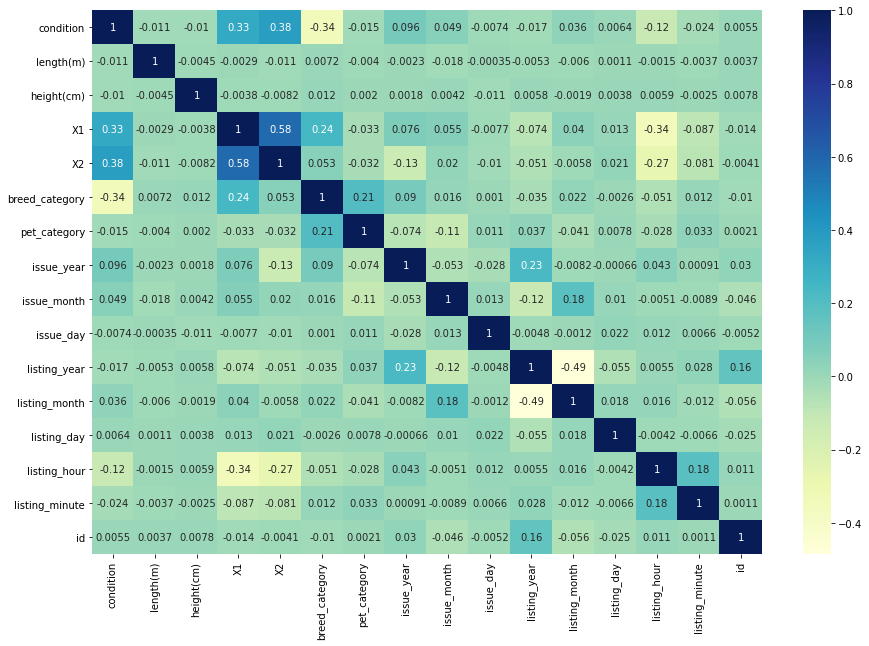

In [5]:
## Let's check the correlation
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(import_train.corr(),
              annot=True,
              cmap="YlGnBu")


In [11]:
## Let's convert the imported data into numerical format
import_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       18834 non-null  float64
 1   color_type      18834 non-null  object 
 2   length(m)       18834 non-null  float64
 3   height(cm)      18834 non-null  float64
 4   X1              18834 non-null  int64  
 5   X2              18834 non-null  int64  
 6   breed_category  18834 non-null  float64
 7   pet_category    18834 non-null  int64  
 8   issue_year      18834 non-null  int64  
 9   issue_month     18834 non-null  int64  
 10  issue_day       18834 non-null  int64  
 11  listing_year    18834 non-null  int64  
 12  listing_month   18834 non-null  int64  
 13  listing_day     18834 non-null  int64  
 14  listing_hour    18834 non-null  int64  
 15  listing_minute  18834 non-null  int64  
 16  id              18834 non-null  int64  
dtypes: float64(4), int64(12), objec

# Dealing with the Test data

In [4]:
test_data=pd.read_csv("test.csv")
test_data

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


# CHECKING THE MODEL TRAINING

In [8]:
import_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       18834 non-null  float64
 1   color_type      18834 non-null  object 
 2   length(m)       18834 non-null  float64
 3   height(cm)      18834 non-null  float64
 4   X1              18834 non-null  int64  
 5   X2              18834 non-null  int64  
 6   breed_category  18834 non-null  float64
 7   pet_category    18834 non-null  int64  
 8   issue_year      18834 non-null  int64  
 9   issue_month     18834 non-null  int64  
 10  issue_day       18834 non-null  int64  
 11  listing_year    18834 non-null  int64  
 12  listing_month   18834 non-null  int64  
 13  listing_day     18834 non-null  int64  
 14  listing_hour    18834 non-null  int64  
 15  listing_minute  18834 non-null  int64  
 16  id              18834 non-null  int64  
dtypes: float64(4), int64(12), objec

In [ ]:
model.scor